In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import nltk
nltk.download('all')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\rajro\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\rajro\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\rajro\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\rajro\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\rajro\AppData\Roaming\nltk_data...
[

In [3]:
# Loading the data

df = pd.read_csv('csv_order\ArianaGrande.csv')
df.head()

<>:3: SyntaxWarning: invalid escape sequence '\A'
<>:3: SyntaxWarning: invalid escape sequence '\A'
C:\Users\rajro\AppData\Local\Temp\ipykernel_9496\571807912.py:3: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv('csv_order\ArianaGrande.csv')


,Artist,Title,Album,Date,Lyric,Year
0,Ariana Grande,"​thank u, next","thank u, next",2018-11-03,thought i'd end up with sean but he wasn't a m...,2018.0
1,Ariana Grande,7 rings,"thank u, next",2019-01-18,yeah breakfast at tiffany's and bottles of bub...,2019.0
2,Ariana Grande,​God is a woman,Sweetener,2018-07-13,you you love it how i move you you love it how...,2018.0
3,Ariana Grande,Side To Side,Dangerous Woman,2016-05-20,ariana grande nicki minaj i've been here all ...,2016.0
4,Ariana Grande,​​no tears left to cry,Sweetener,2018-04-20,right now i'm in a state of mind i wanna be in...,2018.0


**Data Cleaning**

In [4]:
# Removing irrelevant columns
df.drop(['Artist', 'Year', 'Date'], axis=1, inplace = True)
df.head()

,Title,Album,Lyric
0,"​thank u, next","thank u, next",thought i'd end up with sean but he wasn't a m...
1,7 rings,"thank u, next",yeah breakfast at tiffany's and bottles of bub...
2,​God is a woman,Sweetener,you you love it how i move you you love it how...
3,Side To Side,Dangerous Woman,ariana grande nicki minaj i've been here all ...
4,​​no tears left to cry,Sweetener,right now i'm in a state of mind i wanna be in...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   308 non-null    object
 1   Album   308 non-null    object
 2   Lyric   308 non-null    object
dtypes: object(3)
memory usage: 7.3+ KB


In [6]:
# Since there are NaN in Lyric column, casting the column type as string
# Then NaN will be removed later

df = df.astype({'Lyric':'str'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   308 non-null    object
 1   Album   308 non-null    object
 2   Lyric   308 non-null    object
dtypes: object(3)
memory usage: 7.3+ KB


In [7]:
df.shape

(308, 3)

In [8]:
# As can be seen in the df, there are artist names in the Lyric
# Listing the possible names mentioned here

name_list = [
'ariana', 'ari', 'grande', 'ariana grande', 'god', 'goddess', 'mrs grande',
'dangerous woman', 'moonlight', 'princess', 'baby', 'queen', 'yuh',
'mac miller', 'big sean', 'pete davidson', 'victoria monét', 'nicki minaj',
'iggy azalea', 'zedd', 'the weeknd', 'justin bieber', 'john legend',
'childish gambino', 'cashmere cat', 'jessie j', 'doja cat', 'lady gaga',
'miley cyrus', 'dixie d\'amelio', 'dalton gomez', '2 chainz', 'social house',
'pharrell williams', 'ty dolla $ign', 'tayla parx', 'thundercat', 'troye sivan',
'kristin chenoweth', 'patti labelle', 'stevie wonder', 'a$ap ferg', 'macy gray',
'missy elliott', 'future', 't.i.', 'lil wayne'
]
names = '|'.join(name_list)

df[df['Lyric'].str.contains(names)]

,Title,Album,Lyric
0,"​thank u, next","thank u, next",thought i'd end up with sean but he wasn't a m...
1,7 rings,"thank u, next",yeah breakfast at tiffany's and bottles of bub...
2,​God is a woman,Sweetener,you you love it how i move you you love it how...
3,Side To Side,Dangerous Woman,ariana grande nicki minaj i've been here all ...
4,​​no tears left to cry,Sweetener,right now i'm in a state of mind i wanna be in...
...,...,...,...
302,Ariana Grande - pov (terjemahan bahasa indonesia),Unknown,bait ini seperti kamu memiliki kekuatan super...
303,God is a Woman (Excuse me i love you LIVE),Unknown,you you love it how i move you love it how i t...
305,Right here,Unknown,lalalalalalala oooooh lets do what we want th...
306,Venuss*,Unknown,no lyrics for this song come back soon


In [9]:
# Function to clean lyrics

def cleaning_lyrics(lyric):
    if lyric != "nan":
        for name in name_list:
            lyric = lyric.replace(name, '').strip()
            lyric = lyric.lower()
    else:
        lyric = lyric.replace("nan", '').strip()
    return lyric

# Apply the function to the 'Lyric' column

df['Cleaned Lyric'] = df['Lyric'].apply(cleaning_lyrics)
df

,Title,Album,Lyric,Cleaned Lyric
0,"​thank u, next","thank u, next",thought i'd end up with sean but he wasn't a m...,thought i'd end up with sean but he wasn't a m...
1,7 rings,"thank u, next",yeah breakfast at tiffany's and bottles of bub...,yeah breakfast at tiffany's and bottles of bub...
2,​God is a woman,Sweetener,you you love it how i move you you love it how...,you you love it how i move you you love it how...
3,Side To Side,Dangerous Woman,ariana grande nicki minaj i've been here all ...,i've been here all night i've been here all d...
4,​​no tears left to cry,Sweetener,right now i'm in a state of mind i wanna be in...,right now i'm in a state of mind i wanna be in...
...,...,...,...,...
303,God is a Woman (Excuse me i love you LIVE),Unknown,you you love it how i move you love it how i t...,you you love it how i move you love it how i t...
304,Magic*,Unknown,come back soon when there is lyrics,come back soon when there is lyrics
305,Right here,Unknown,lalalalalalala oooooh lets do what we want th...,lalalalalalala oooooh lets do what we want th...
306,Venuss*,Unknown,no lyrics for this song come back soon,no lyrics for this song come back soon


In [10]:
# Generating Wordcloud

STOPWORDS = STOPWORDS

wc = WordCloud(
        background_color='white',
        stopwords=STOPWORDS,
        height=2000,
        width=2000,
        max_words=200, 
        min_font_size=10, 
        relative_scaling=0.5
)

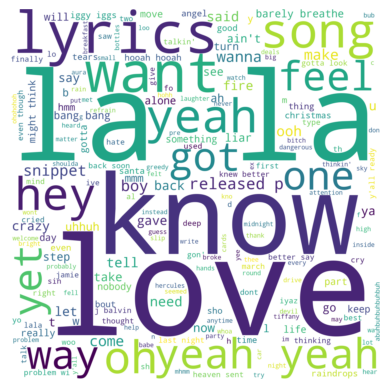

In [11]:
wc.generate(df['Cleaned Lyric'].to_string())
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**Text Analysis using TextBlob**

In [12]:
# Removing stopwords and tokenizing cleaned lyrics for sentiment analysis

def tokenizing(lyrics):
    tokens = word_tokenize(lyrics)
    filtered_tokens = []
    for token in tokens:
        if token not in stopwords.words('english'):
            filtered_tokens.append(token)
    cleaned_text = " ".join(filtered_tokens)
    return cleaned_text

df['Tokenized Lyric'] = df['Cleaned Lyric'].apply(tokenizing)
df

,Title,Album,Lyric,Cleaned Lyric,Tokenized Lyric
0,"​thank u, next","thank u, next",thought i'd end up with sean but he wasn't a m...,thought i'd end up with sean but he wasn't a m...,thought 'd end sean n't match wrote songs rick...
1,7 rings,"thank u, next",yeah breakfast at tiffany's and bottles of bub...,yeah breakfast at tiffany's and bottles of bub...,yeah breakfast tiffany 's bottles bubbles girl...
2,​God is a woman,Sweetener,you you love it how i move you you love it how...,you you love it how i move you you love it how...,love move love touch one said done 'll believe...
3,Side To Side,Dangerous Woman,ariana grande nicki minaj i've been here all ...,i've been here all night i've been here all d...,'ve night 've day boy got walkin ' side side l...
4,​​no tears left to cry,Sweetener,right now i'm in a state of mind i wanna be in...,right now i'm in a state of mind i wanna be in...,right 'm state mind wan na like time ai n't go...
...,...,...,...,...,...
303,God is a Woman (Excuse me i love you LIVE),Unknown,you you love it how i move you love it how i t...,you you love it how i move you love it how i t...,love move love touch one said done believe wom...
304,Magic*,Unknown,come back soon when there is lyrics,come back soon when there is lyrics,come back soon lyrics
305,Right here,Unknown,lalalalalalala oooooh lets do what we want th...,lalalalalalala oooooh lets do what we want th...,lalalalalalala oooooh lets want shits beautifu...
306,Venuss*,Unknown,no lyrics for this song come back soon,no lyrics for this song come back soon,lyrics song come back soon


In [13]:
# Sentiment analysis using VADER

sia = SentimentIntensityAnalyzer()

In [14]:
def sentiment(tokenized):
    sentiment_score = sia.polarity_scores(tokenized)
    
    return sentiment_score

df['Sentiment Score'] = df['Tokenized Lyric'].apply(sentiment)

df[['Neg', 'Neu', 'Pos', 'Compound']] = df['Sentiment Score'].apply(pd.Series)

df

,Title,Album,Lyric,Cleaned Lyric,Tokenized Lyric,Sentiment Score,Neg,Neu,Pos,Compound
0,"​thank u, next","thank u, next",thought i'd end up with sean but he wasn't a m...,thought i'd end up with sean but he wasn't a m...,thought 'd end sean n't match wrote songs rick...,"{'neg': 0.08, 'neu': 0.446, 'pos': 0.474, 'com...",0.080,0.446,0.474,0.9994
1,7 rings,"thank u, next",yeah breakfast at tiffany's and bottles of bub...,yeah breakfast at tiffany's and bottles of bub...,yeah breakfast tiffany 's bottles bubbles girl...,"{'neg': 0.118, 'neu': 0.501, 'pos': 0.381, 'co...",0.118,0.501,0.381,0.9964
2,​God is a woman,Sweetener,you you love it how i move you you love it how...,you you love it how i move you you love it how...,love move love touch one said done 'll believe...,"{'neg': 0.0, 'neu': 0.621, 'pos': 0.379, 'comp...",0.000,0.621,0.379,0.9979
3,Side To Side,Dangerous Woman,ariana grande nicki minaj i've been here all ...,i've been here all night i've been here all d...,'ve night 've day boy got walkin ' side side l...,"{'neg': 0.106, 'neu': 0.796, 'pos': 0.098, 'co...",0.106,0.796,0.098,-0.6782
4,​​no tears left to cry,Sweetener,right now i'm in a state of mind i wanna be in...,right now i'm in a state of mind i wanna be in...,right 'm state mind wan na like time ai n't go...,"{'neg': 0.099, 'neu': 0.655, 'pos': 0.246, 'co...",0.099,0.655,0.246,0.9848
...,...,...,...,...,...,...,...,...,...,...
303,God is a Woman (Excuse me i love you LIVE),Unknown,you you love it how i move you love it how i t...,you you love it how i move you love it how i t...,love move love touch one said done believe wom...,"{'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'comp...",0.000,0.573,0.427,0.9923
304,Magic*,Unknown,come back soon when there is lyrics,come back soon when there is lyrics,come back soon lyrics,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
305,Right here,Unknown,lalalalalalala oooooh lets do what we want th...,lalalalalalala oooooh lets do what we want th...,lalalalalalala oooooh lets want shits beautifu...,"{'neg': 0.147, 'neu': 0.498, 'pos': 0.355, 'co...",0.147,0.498,0.355,0.7783
306,Venuss*,Unknown,no lyrics for this song come back soon,no lyrics for this song come back soon,lyrics song come back soon,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000


In [15]:
# Categorize the sentiment as Positive, Neutral, and Negative

def categorize(x):
    if x > 0:
        return "Positive"
    if x < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Compound'].apply(categorize)
df

,Title,Album,Lyric,Cleaned Lyric,Tokenized Lyric,Sentiment Score,Neg,Neu,Pos,Compound,Sentiment
0,"​thank u, next","thank u, next",thought i'd end up with sean but he wasn't a m...,thought i'd end up with sean but he wasn't a m...,thought 'd end sean n't match wrote songs rick...,"{'neg': 0.08, 'neu': 0.446, 'pos': 0.474, 'com...",0.080,0.446,0.474,0.9994,Positive
1,7 rings,"thank u, next",yeah breakfast at tiffany's and bottles of bub...,yeah breakfast at tiffany's and bottles of bub...,yeah breakfast tiffany 's bottles bubbles girl...,"{'neg': 0.118, 'neu': 0.501, 'pos': 0.381, 'co...",0.118,0.501,0.381,0.9964,Positive
2,​God is a woman,Sweetener,you you love it how i move you you love it how...,you you love it how i move you you love it how...,love move love touch one said done 'll believe...,"{'neg': 0.0, 'neu': 0.621, 'pos': 0.379, 'comp...",0.000,0.621,0.379,0.9979,Positive
3,Side To Side,Dangerous Woman,ariana grande nicki minaj i've been here all ...,i've been here all night i've been here all d...,'ve night 've day boy got walkin ' side side l...,"{'neg': 0.106, 'neu': 0.796, 'pos': 0.098, 'co...",0.106,0.796,0.098,-0.6782,Negative
4,​​no tears left to cry,Sweetener,right now i'm in a state of mind i wanna be in...,right now i'm in a state of mind i wanna be in...,right 'm state mind wan na like time ai n't go...,"{'neg': 0.099, 'neu': 0.655, 'pos': 0.246, 'co...",0.099,0.655,0.246,0.9848,Positive
...,...,...,...,...,...,...,...,...,...,...,...
303,God is a Woman (Excuse me i love you LIVE),Unknown,you you love it how i move you love it how i t...,you you love it how i move you love it how i t...,love move love touch one said done believe wom...,"{'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'comp...",0.000,0.573,0.427,0.9923,Positive
304,Magic*,Unknown,come back soon when there is lyrics,come back soon when there is lyrics,come back soon lyrics,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,Neutral
305,Right here,Unknown,lalalalalalala oooooh lets do what we want th...,lalalalalalala oooooh lets do what we want th...,lalalalalalala oooooh lets want shits beautifu...,"{'neg': 0.147, 'neu': 0.498, 'pos': 0.355, 'co...",0.147,0.498,0.355,0.7783,Positive
306,Venuss*,Unknown,no lyrics for this song come back soon,no lyrics for this song come back soon,lyrics song come back soon,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,Neutral


**Visualizing the Sentiment**

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

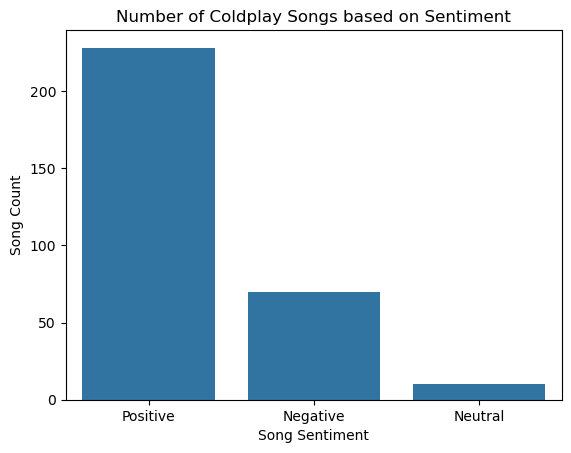

In [17]:
sns.countplot(x=df['Sentiment'], data=df).set(title='Number of Coldplay Songs based on Sentiment')
plt.xlabel('Song Sentiment')
plt.ylabel('Song Count')
plt.show()

**How's the sentiment in each album?**

In [18]:
album_sentiment = df.groupby('Album')['Compound'].mean().reset_index().sort_values(by='Compound', ascending = False).reset_index(drop=True)
album_sentiment.head()

,Album,Compound
0,"thank u, next (Japanese Import)",0.99780
1,We Love Disney,0.99750
2,Positions (Deluxe),0.99710
3,Charlie’s Angels (Original Motion Picture Soun...,0.99280
4,Remixes by DJ Siembab,0.99125


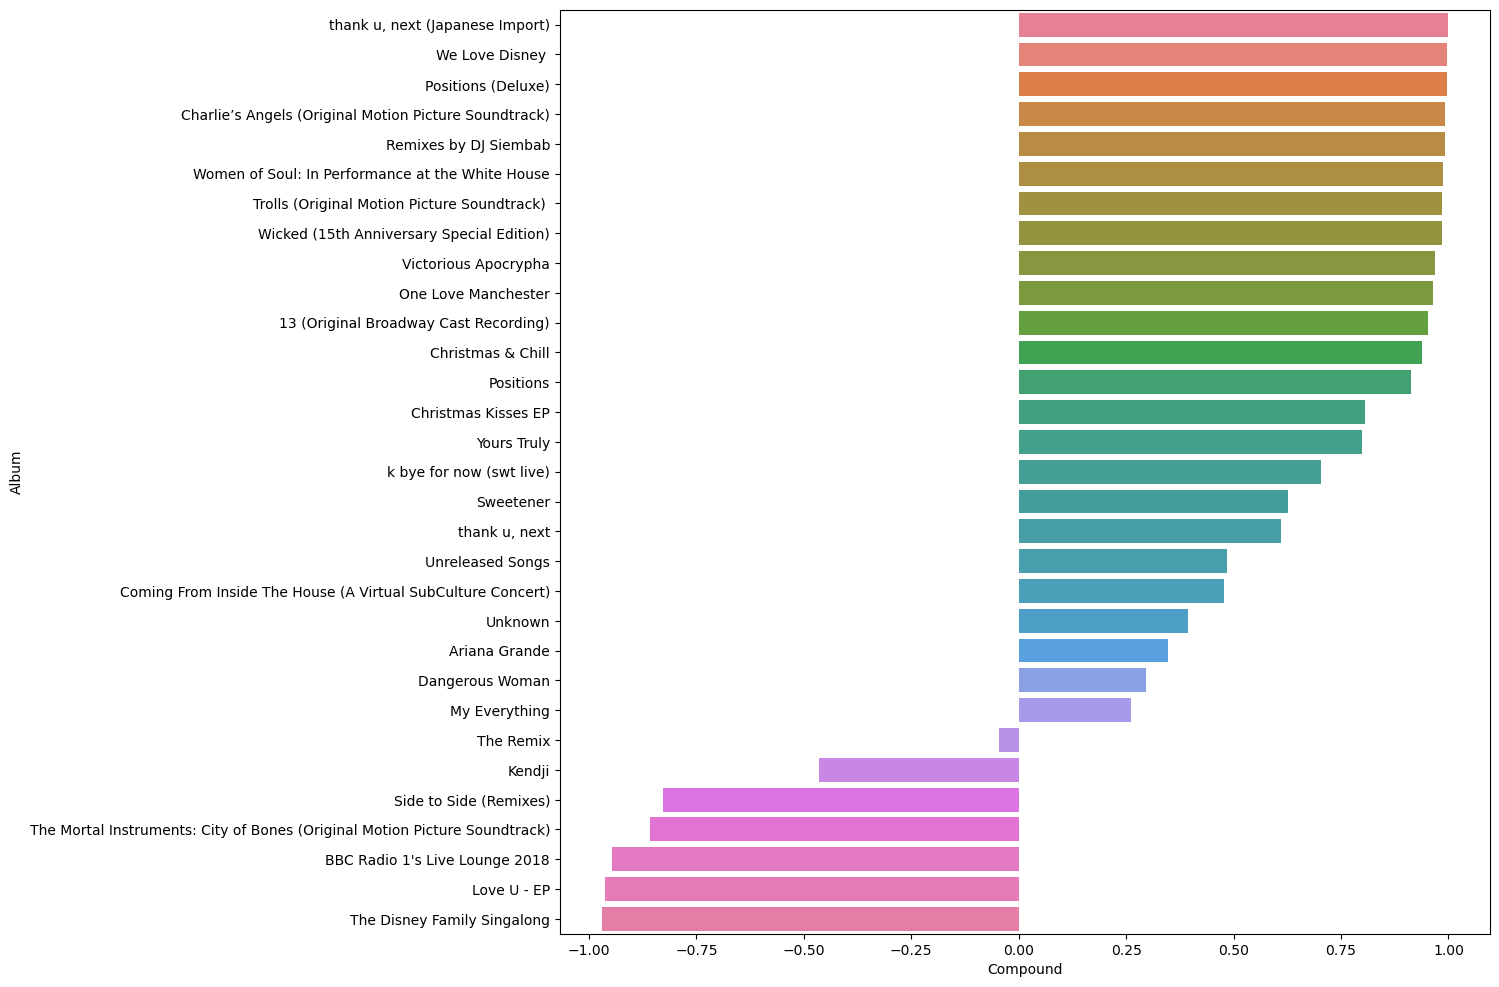

In [19]:
plt.figure(figsize =(12,12))
sns.barplot(x='Compound', y='Album', data = album_sentiment, hue='Album')
plt.show()

**Which songs has the most positive and most negative sentiment?**

In [20]:
pos_song = df[df['Compound'] == df['Compound'].max()]
neg_song = df[df['Compound'] == df['Compound'].min()]

print(f"The most positive song is {pos_song['Title'].to_string(index=False)} with a sentiment value of {pos_song['Compound'].to_string(index=False)}")
print(f"The most negative song is {neg_song['Title'].to_string(index=False)} with a sentiment value of {neg_song['Compound'].to_string(index=False)} ")

The most positive song is Love Is Everything with a sentiment value of 1.0
The most negative song is Knew Better Part Two with a sentiment value of -0.9976 


In [21]:
pd.set_option('display.max_colwidth', None)

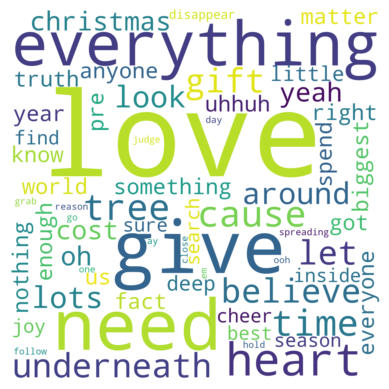

In [22]:
# Wordcloud of the most positive song

wc.generate(pos_song['Cleaned Lyric'].to_string())
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

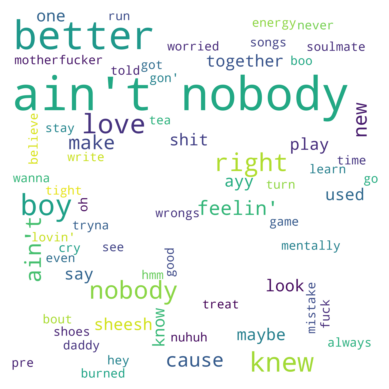

In [23]:
# Wordcloud of the most negative song

wc.generate(neg_song['Cleaned Lyric'].to_string())
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**Conclusion**

From this analysis, here are some key takeaways:
1. The most common words in Coldplay songs are "love", "give", "need" and "everything"
2. Majority of Coldplay songs has positive sentiment, which might be correlated to how their songs are perceived as happy and uplifting
3. "Thank u, next" and "We love Disney" appears to be the most positive albums and "The Disney Family Singalong" is the most negative one
3. The most positive song is "Love Is Everything" and words like "love", "believe", "heart", and "underneath" are most spoken. 
4. On the other hand, "Knew Better Part Two" is the most negative song in this database, which is manifested in the title itself. Words like "ain't", "nobody", "better" and "boy" are the most common one